# SHARK ATTACKS 🦈

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt
from IPython import display
import matplotlib.pyplot as plt
import squarify
from wordcloud import WordCloud, STOPWORDS
sns.set_theme(style="white", palette="Spectral")

## 1. Data Cleaning

First I downloaded the dataframe and cleaned it. The data had more than 25 thousand rows and 24 columns, but around 79% of the data was missing. So I got rid of more than 20 thousand rows and more than 10 columns which didn't add anything to my analysis. I also extracted the month from the Date column, and got rid of the day, and changed the name of some columns, to make data manipulation easier later on.

In [2]:
df = pd.read_csv("/Users/narea/Desktop/ironhack/Project-1/data/attacks.csv", encoding = 'unicode_escape')

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.iloc[100]

As we can see in the following table, most of the columns are missing at least 75% of the data. That's why I got rid of missing values to get smaller but more valuable dataframe. 

In [10]:
df_nan = df.isna().sum()
percent = df_nan * 100 / len(df)
missing_values = pd.DataFrame({'Missing values': df_nan, 'Missing %': percent})
missing_values

,Missing values,Missing %
Year,0,0.000000
Country,7,0.219987
Activity,100,3.142678
Age,131,4.116908
Fatal (Y/N),0,0.000000
Time,948,29.792583
Month,146,4.588309
Sex,0,0.000000
Species,1234,38.780641


In [11]:
missing_values.mean()

Missing values    285.111111
Missing %           8.960123
dtype: float64

In [3]:
df.dropna(subset = ['Age'], inplace = True)

In [ ]:
df_nan = df.isna().sum()
percent = df_nan * 100 / len(df)
missing_values = pd.DataFrame({'Missing values': df_nan, 'Missing %': percent})
missing_values

In [4]:
df.drop(["Unnamed: 22", "Unnamed: 23", "href", "Case Number.1", "Case Number.2", "pdf", "Case Number", "href formula", "Investigator or Source","original order","Type","Injury","Location","Area", "Name"], axis=1, inplace=True)

In [5]:
df['Month'] = df['Date'].str.extract('(-\D{3}-)', expand=True)
regex_list = [r"(-\D{3}-): ", r"-"]
df['Month'] = df['Month'].replace(regex=regex_list, value="")
df.drop(["Date"], axis=1, inplace=True)

In [6]:
df['Fatal (Y/N)'] = df['Fatal (Y/N)'].str.strip().str.upper()
df['Sex '] = df['Sex '].str.strip().str.upper()
df = df[((df['Fatal (Y/N)']=='N') | (df['Fatal (Y/N)']=='Y')) & ((df['Sex ']=='M') | (df['Sex ']=='F'))]
df['Sex'] = df['Sex '].str.rstrip()
df = df.drop("Sex ", axis=1)
df['Species'] = df['Species '].str.rstrip()
df = df.drop("Species ", axis=1)

In [7]:
df['Age'] = df['Age'].dropna().apply(lambda x: re.findall(r"\d{2}",x))  
df['Age'] = df['Age'].str[0] 
df['Age'] = df['Age'].astype(float) 

# Exploratory Data Analysis

## 1.1. Year

To explore the attacks per year I focused on the data from 1800 to 2018, and got rid of some outliers the dataframe had. As we can see in the following graph, attacks have been increasing in the last 60 years, this may be due to the increase of ocean related activities in the last decades. Still, even though there have been more attacks, the probablity of dying from one of these, has been lower each year. Even if there are more attacks nowadays, the number of fatal victims has stayed the same. 

In [8]:
df = df[(df['Year']>=1800)]

In [9]:
df['Year'] = df[['Year']].astype(int)

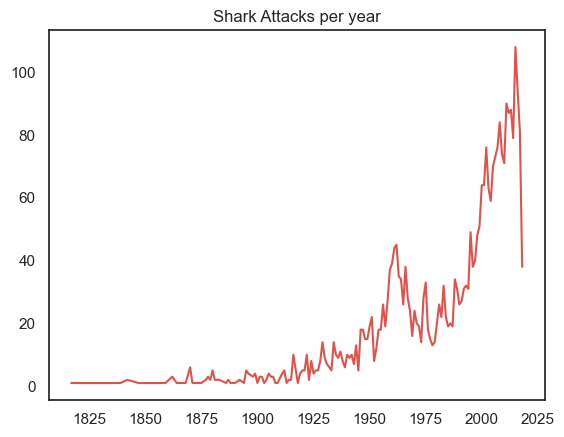

In [12]:
years = df['Year'].value_counts().sort_index()
%matplotlib inline
years.plot(title="Shark Attacks per year")
plt.savefig('year.png')

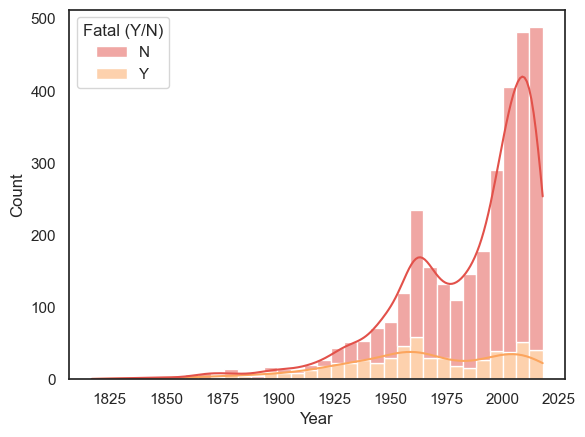

In [13]:
sns.histplot(data=df, x='Year', hue='Fatal (Y/N)', multiple='stack', kde=True)
plt.savefig('year_fatal.png')

## 1.2. Age

By exploring the age of the victims, it's easy to see that the youth is more affected by shark attacks, probably due to the presence of this age range in the ocean. The people most affected are the one's from age 18-20. 

In [14]:
df = df[(df['Age']<=90)]

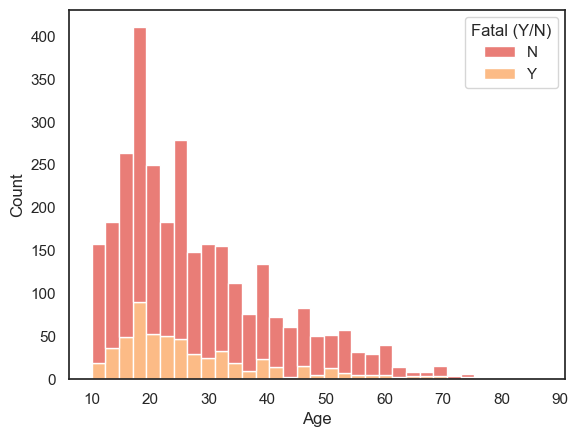

In [15]:
age = df['Age'].value_counts().sort_index()
sns.histplot(data=df, x='Age', hue='Fatal (Y/N)', multiple='stack')
plt.savefig('age.png')

## 1.3. Sex

Men are more probable to be attacked by a shark. 

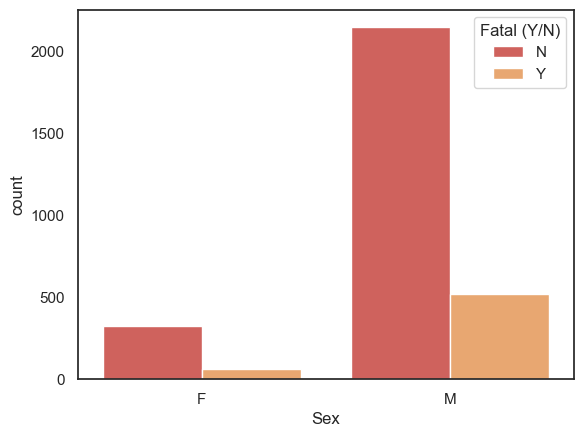

In [16]:
sns.countplot(data=df, x="Sex", hue="Fatal (Y/N)")
plt.savefig('sex.png')

## 1.4. Species

And the oscar to the shark with more attacks goes to the one and only...white shark. Steven Spielberg knew who to cast for his Oscar winning movie. 

In [17]:
df['Species'].value_counts()[:10]

White shark         94
Tiger shark         44
Bull shark          37
4' shark            34
6' shark            29
1.8 m [6'] shark    28
1.2 m [4'] shark    24
4' to 5' shark      19
5' shark            17
1.5 m [5'] shark    17
Name: Species, dtype: int64

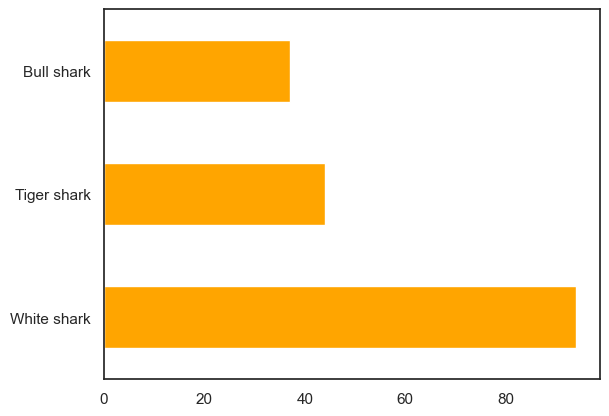

In [18]:
sharks = df['Species'].value_counts()
sharks[sharks>36].plot.barh(color='orange')
plt.savefig('species.png')

## 1.5. Countries

If you don't like thrilling, pulse-raising or breath-taking adventures, these are the places to avoid. If you are the opposite, these are the places to go. The 10 countries with most shark attacks are the shown in the next table. 

In [19]:
df['Country'].value_counts()[:10]

USA                 1311
AUSTRALIA            642
SOUTH AFRICA         339
BAHAMAS               64
BRAZIL                56
NEW ZEALAND           46
MEXICO                37
PAPUA NEW GUINEA      35
REUNION               35
FIJI                  28
Name: Country, dtype: int64

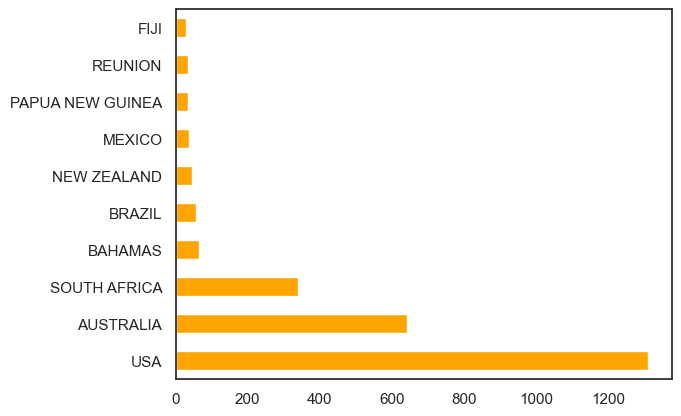

In [20]:
countries = df['Country'].value_counts()
countries[countries>26].plot.barh(color='orange')
plt.savefig('countries.png')

## 1.6. Activity

In [21]:
df['Activity'].value_counts()[:10]

Surfing          725
Swimming         476
Spearfishing     199
Fishing          123
Wading           101
Standing          69
Snorkeling        63
Body boarding     55
Bathing           46
Scuba diving      42
Name: Activity, dtype: int64

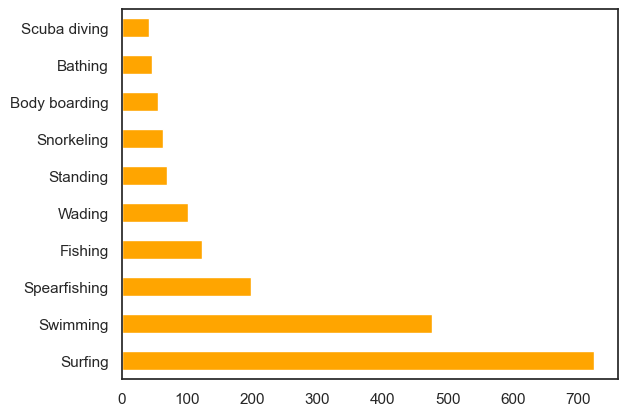

In [22]:
activities = df['Activity'].value_counts()
activities[:10].plot.barh(color='orange')
plt.savefig('act.png')

## H1: shark attacks are more likely to occur in the afternoon

My first hypothesis was that shark attacks are more likely to occur in the afternoon. 

In [23]:
df['Time'] = df['Time'].str.extract("([0-9]+)", expand=False).dropna().astype(int)

In [25]:
df = df[(df['Time']<=24)]

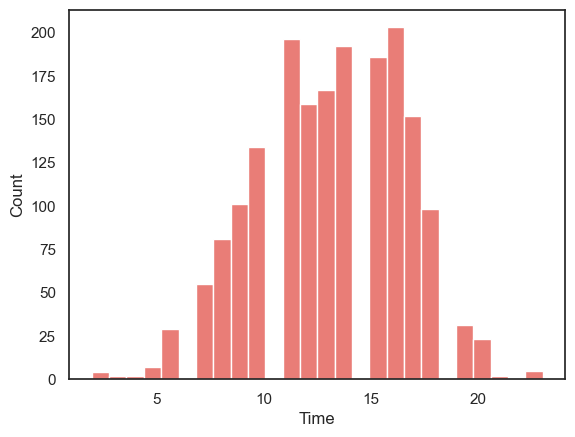

In [26]:
sns.histplot(data=df, x="Time")
plt.savefig('time.png')

## H2: summer is the season with most shark attacks. 

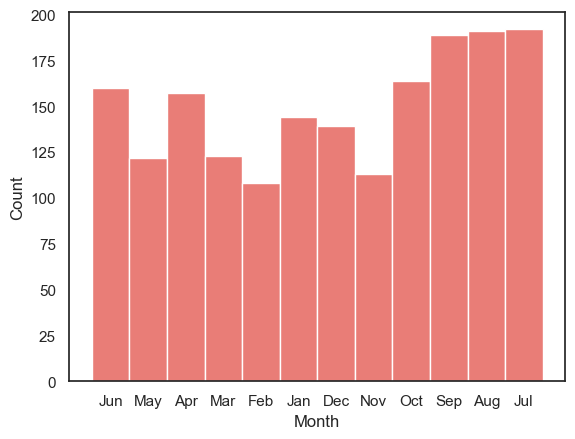

In [27]:
df["Month"].value_counts()
df.dropna(subset= ['Month'], inplace = True)
sns.histplot(data=df, x="Month")
plt.savefig('season_1.png')

In [28]:
country = df['Country'].unique()

In [29]:
season_north = {'Jan':'winter','Feb':'winter','Mar':'spring','Apr':'spring','May':'spring','Jun':'summer',
           'Jul':'summer','Aug':'summer','Sep':'autumn','Oct':'autumn','Nov':'autumn', 'Dec':'winter'}
season_south = {'Jan':'summer','Feb':'summer','Mar':'autumn','Apr':'autumn','May':'autumn','Jun':'winter',
           'Jul':'winter','Aug':'winter','Sep':'spring','Oct':'spring','Nov':'spring', 'Dec':'summer'}
north = ['ADMIRALTY ISLANDS',' TONGA','AMERICAN SAMOA','ARUBA', 'AZORES','BARBADOS','BAHAMAS', 'BERMUDA', 'BELIZE','BRITISH ISLES',
      'DOMINICAN REPUBLIC','COSTA RICA','CROATIA','CUBA','ENGLAND','CHINA','IRAQ','IRAN','ISRAEL','ITALY','JAPAN','COLUMBIA','CANADA','CENTRAL PACIFIC',
       'CARIBBEAN SEA', 'TURKS & CAICOS','ST. MAARTIN','ST. MARTIN', 'TRINIDAD & TOBAGO', 'TONGA','TAIWAN','VIETNAM','THAILAND','USA', 'SOUTH CHINA SEA', 'SOUTH KOREA','UNITED KINGDOM','UNITED ARAB EMIRATES (UAE)','UNITED ARAB EMIRATES','SRI LANKA', 'PUERTO RICO','PHILIPPINES','TURKEY','SPAIN','SINGAPORE','PALESTINIAN TERRITORIES','SOMALIA','SIERRA LEONE','PANAMA','SENEGAL', 'SAUDI ARABIA','SCOTLAND','RUSSIA','PORTUGAL','PALA','OKINAWA','NICARAGUA','NIGERIA','MICRONESIA','NEW BRITAIN','MID ATLANTIC OCEAN','MARSHALL ISLANDS', 'MALAYSIA','JAMAICA', 'INDIA', 'HONG KONG','HONDURAS','GUINEA','GUAM','GRENADA','EL SALVADOR', 'CAYMAN ISLANDS','GRAND CAYMAN','FEDERATED STATES OF MICRONESIA', 'MALTA', 'GREECE','FRANCE','MEXICO','NORWAY','BRITISH VIRGIN ISLANDS', 'BRITISH WEST INDIES',]
south = ['ARGENTINA','PAPUA NEW GUINEA', 'WESTERN SAMOA','URUGUAY','TANZANIA', 'SOLOMON ISLANDS','SAMOA','SEYCHELLES','ANDAMAN / NICOBAR ISLANDAS', 'AUSTRALIA', 'BRAZIL','BRITISH NEW GUINEA','CHILE','EGYPT ','EGYPT','CAPE VERDE','ECUADOR','FIJI','Fiji',
      'DIEGO GARCIA','NEW GUINEA','VANUATU','VENEZUELA','SOUTH AFRICA','NEW CALEDONIA','MOZAMBIQUE','NEW ZEALAND', 'KENYA','KIRIBATI','MADAGASCAR','MAURITIUS', 'MALDIVES','FRENCH POLYNESIA','INDONESIA',]

In [30]:
def hemisphere(country):
    if country in north:
        return 'Northern Hemisphere'
    elif country in south:
        return 'Southern Hemisphere'
    else:
        return 

In [31]:
def season(hemisphere,month):
    if hemisphere == 'Southern Hemisphere':
        return season_south[month]
    elif hemisphere == 'Northern Hemisphere':
        return season_north[month]
    else:
        return ''

In [32]:
df['Hemisphere'] = df['Country'].apply(lambda x: hemisphere(x))

In [33]:
df['Season'] = df.apply(lambda x: season(x['Hemisphere'], x['Month']),1)

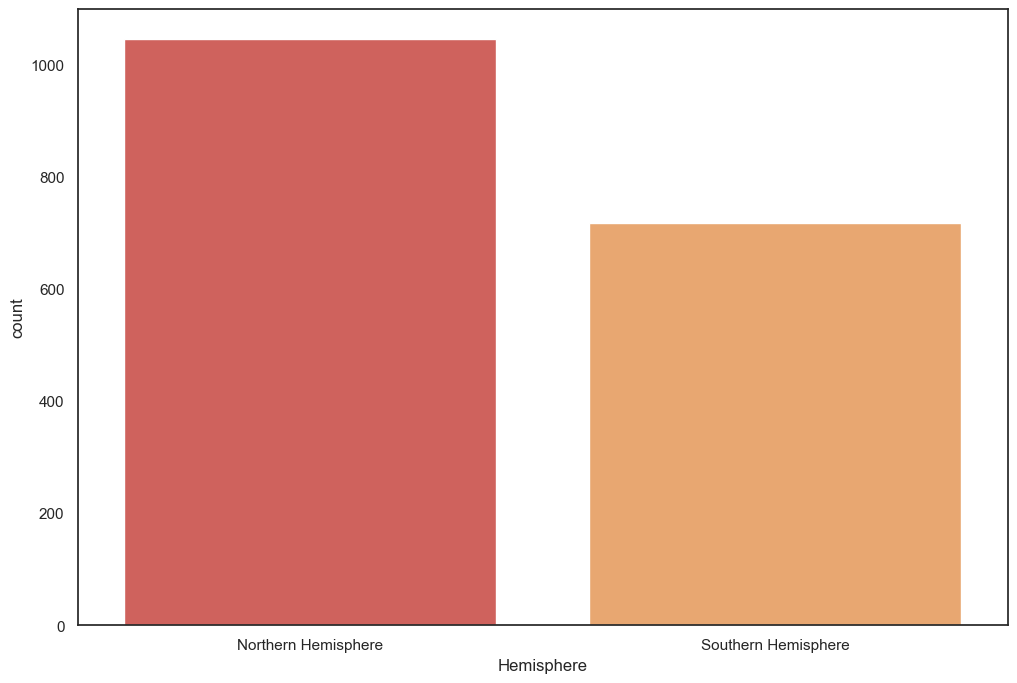

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(ax=ax,x=df.loc[df['Hemisphere']!=''].Hemisphere)
plt.savefig('season_2.png')

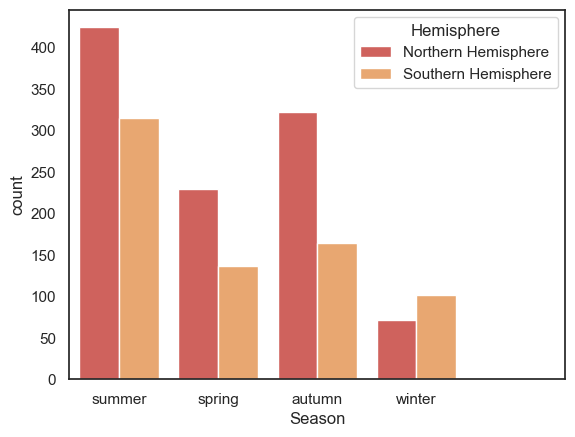

In [35]:
sns.countplot(x=df["Season"], hue= df['Hemisphere'])
plt.savefig('season_3.png')